## 4. External dataset

We will look at the Census dataset 2021 from ABS.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
from shapely import wkt
import requests
import os

The shapefile was downloaded from "https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files/SA2_2021_AUST_SHP_GDA2020.zip".

In [3]:
sa2_boundary_gdf = gpd.read_file("../data/tables/sa2_boundary/SA2_2021_AUST_GDA2020.shp")
sa2_boundary_gdf.shape

(2473, 17)

In [4]:
sa2_boundary_gdf.head(5)

,SA2_CODE21,SA2_NAME21,CHG_FLAG21,CHG_LBL21,SA3_CODE21,SA3_NAME21,SA4_CODE21,SA4_NAME21,GCC_CODE21,GCC_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
0,101021007,Braidwood,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,3418.3525,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.58424 -35.44426, 149.58444 -35.4..."
1,101021008,Karabar,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,6.9825,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.21899 -35.36738, 149.218 -35.366..."
2,101021009,Queanbeyan,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,4.7620,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.21326 -35.34325, 149.21619 -35.3..."
3,101021010,Queanbeyan - East,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,13.0032,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.24034 -35.34781, 149.24024 -35.3..."
4,101021012,Queanbeyan West - Jerrabomberra,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,13.6748,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.19572 -35.36126, 149.1997 -35.35..."


It includes SA2 geometries along with additional attributes, such as the corresponding SA3 and SA4 areas to which each region belongs.

In [24]:
# Check missing values
sa2_boundary_gdf[sa2_boundary_gdf.geometry.isna() == True]

,SA2_CODE21,SA2_NAME21,CHG_FLAG21,CHG_LBL21,SA3_CODE21,SA3_NAME21,SA4_CODE21,SA4_NAME21,GCC_CODE21,GCC_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
642,197979799,Migratory - Offshore - Shipping (NSW),0,No change,19797,Migratory - Offshore - Shipping (NSW),197,Migratory - Offshore - Shipping (NSW),19799,Migratory - Offshore - Shipping (NSW),1,New South Wales,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/SA2/...,None
643,199999499,No usual address (NSW),0,No change,19999,No usual address (NSW),199,No usual address (NSW),19499,No usual address (NSW),1,New South Wales,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/SA2/...,None
1166,297979799,Migratory - Offshore - Shipping (Vic.),0,No change,29797,Migratory - Offshore - Shipping (Vic.),297,Migratory - Offshore - Shipping (Vic.),29799,Migratory - Offshore - Shipping (Vic.),2,Victoria,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/SA2/...,None
1167,299999499,No usual address (Vic.),0,No change,29999,No usual address (Vic.),299,No usual address (Vic.),29499,No usual address (Vic.),2,Victoria,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/SA2/...,None
1714,397979799,Migratory - Offshore - Shipping (Qld),0,No change,39797,Migratory - Offshore - Shipping (Qld),397,Migratory - Offshore - Shipping (Qld),39799,Migratory - Offshore - Shipping (Qld),3,Queensland,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/SA2/...,None
1715,399999499,No usual address (Qld),0,No change,39999,No usual address (Qld),399,No usual address (Qld),39499,No usual address (Qld),3,Queensland,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/SA2/...,None
1890,497979799,Migratory - Offshore - Shipping (SA),0,No change,49797,Migratory - Offshore - Shipping (SA),497,Migratory - Offshore - Shipping (SA),49799,Migratory - Offshore - Shipping (SA),4,South Australia,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/SA2/...,None
1891,499999499,No usual address (SA),0,No change,49999,No usual address (SA),499,No usual address (SA),49499,No usual address (SA),4,South Australia,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/SA2/...,None
2157,597979799,Migratory - Offshore - Shipping (WA),0,No change,59797,Migratory - Offshore - Shipping (WA),597,Migratory - Offshore - Shipping (WA),59799,Migratory - Offshore - Shipping (WA),5,Western Australia,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/SA2/...,None
2158,599999499,No usual address (WA),0,No change,59999,No usual address (WA),599,No usual address (WA),59499,No usual address (WA),5,Western Australia,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/SA2/...,None


We will just remove them because they are special purpose codes for Indigenous Regions, Indigenous Areas and Indigenous Locations, Migratory – Offshore – Shipping, and outside Australia.

In [4]:
sns.set_style("darkgrid")

<Axes: >

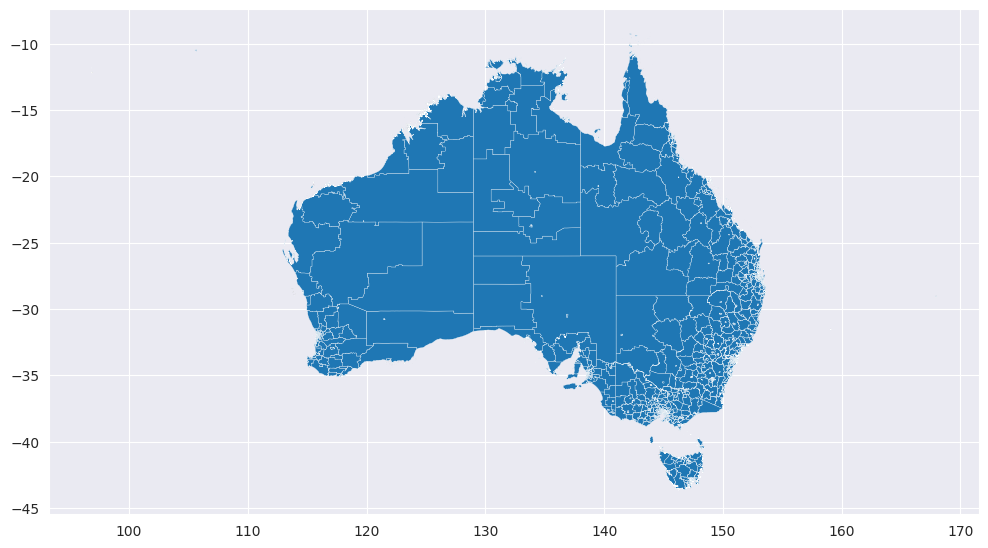

In [5]:
# Visualize SA2 boundary
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

sa2_boundary_gdf.plot(
    ax=ax,
    # edgecolor='red',
    linewidth = 0.2
)

We would like to rechieve the Census data from ABS API.
- **Dictionary**: https://www.abs.gov.au/census/guide-census-data/census-dictionary/2021/variables-index

- API Guide: https://www.abs.gov.au/about/data-services/application-programming-interfaces-apis/data-api-user-guide/using-api

- All available dataflow_id for API url: https://api.data.abs.gov.au/dataflow/all?detail=allstubs

- Information on how to get available dataflow_id csv file: https://www.abs.gov.au/about/data-services/application-programming-interfaces-apis/data-api-user-guide/tutorials-helpful-files-links

- This file gives us information on **which dataflow_id to request**: https://www.abs.gov.au/census/guide-census-data/about-census-tools/download-product-templates/2021_General%20Community%20Profile_R1_R2.xlsx

- Link template for DSD: https://api.data.abs.gov.au/dataflow/ABS/{dataflow_id}?references=codelist



- Download all data - Census DataPacks: https://www.abs.gov.au/census/find-census-data/datapacks (we don't use it)

We decide to consider household income weekly (G33), median mortgage repayments monthly (G02), mortgage repayment monthly (G38) and rent weekly (G40).

In [1]:
# Create path
directory_path = '../data/tables/sa2_dataset/main/'
os.makedirs(directory_path, exist_ok=True)

NameError: name 'os' is not defined

In [7]:
dataflow_ids = ['C21_G33_SA2', 'C21_G38_SA2', 'C21_G40_SA2', 'C21_G02_SA2']

base_path = '../data/tables/sa2_dataset/main/'

for dataflow_id in dataflow_ids:
    url = f'https://api.data.abs.gov.au/data/{dataflow_id}/all'
    headers = {'accept': 'text/csv'}
    
    # Define paths
    file_path = os.path.join(base_path, f'{dataflow_id}.csv')
    filtered_file_path = os.path.join(base_path, f'{dataflow_id}_filtered.csv')

    try:
        # Download file
        response = requests.get(url, headers=headers, stream=True)
        response.raise_for_status()
    
        if 'text/csv' in response.headers.get('Content-Type', ''):
            with open(file_path, 'wb') as file:
                for chunk in response.iter_content(chunk_size=8192):
                    if chunk:
                        file.write(chunk)
        else:
            print(f'Unexpected content type for {dataflow_id}:', response.headers.get('Content-Type'))
            continue 
    
        # Filter location
        data = pd.read_csv(file_path)
        if dataflow_id == 'C21_G02_SA2':
            filtered_data = data[data['MEDAVG'] == 5]
            filtered_data = data[data['REGION_TYPE'] == 'SA2']
        else:
            filtered_data = data[data['REGION_TYPE'] == 'SA2']
            
        filtered_data.to_csv(filtered_file_path, index=False)
        
    except requests.RequestException as e:
        print(f'An error occurred for {dataflow_id}: {e}')


Check data

In [3]:
median_mortgage = pd.read_csv("../data/tables/sa2_dataset/main/C21_G02_SA2_filtered.csv")
median_mortgage.shape

(19722, 7)

In [4]:
median_mortgage.head()

,DATAFLOW,MEDAVG,REGION,REGION_TYPE,STATE,TIME_PERIOD,OBS_VALUE
0,ABS:C21_G02_SA2(1.0.0),1,103031075,SA2,1,2021,0.0
1,ABS:C21_G02_SA2(1.0.0),1,108051168,SA2,1,2021,53.0
2,ABS:C21_G02_SA2(1.0.0),1,119031370,SA2,1,2021,40.0
3,ABS:C21_G02_SA2(1.0.0),1,123011433,SA2,1,2021,42.0
4,ABS:C21_G02_SA2(1.0.0),1,123031448,SA2,1,2021,38.0


In [10]:
household_income_weekly = pd.read_csv("../data/tables/sa2_dataset/main/C21_G33_SA2_filtered.csv")
household_income_weekly.shape

(147780, 8)

In [11]:
household_income_weekly.head()

,DATAFLOW,HIND,HHCD,REGION,REGION_TYPE,STATE,TIME_PERIOD,OBS_VALUE
0,ABS:C21_G33_SA2(1.0.0),7,1_2,101021008,SA2,1,2021,94
1,ABS:C21_G33_SA2(1.0.0),7,_T,101021611,SA2,1,2021,124
2,ABS:C21_G33_SA2(1.0.0),16,3,101041025,SA2,1,2021,0
3,ABS:C21_G33_SA2(1.0.0),16,1_2,101051540,SA2,1,2021,174
4,ABS:C21_G33_SA2(1.0.0),5,_T,102011034,SA2,1,2021,302


### Consideration
- Rename columns
- Remove time_period, dataflow column
- Instead of replace the code with its value, we will mention the value meaning when we perform data analysis.

# Create Cleaning Function

In [2]:
import sys
sys.path.append('../scripts')
from etl import clean_external_df, clean_shapefile_sa2

In [4]:
# Clean and save data in curated folder
clean_external_df()

sa2_boundary_gdf = gpd.read_file("../data/tables/sa2_boundary/SA2_2021_AUST_GDA2020.shp")
clean_sa2 = clean_shapefile_sa2(sa2_boundary_gdf)

Check dataset in curated/sa2_dataset/

In [5]:
dataflow_ids = ['C21_G33_SA2', 'C21_G38_SA2', 'C21_G40_SA2', 'C21_G02_SA2']
base_path = '../data/curated/sa2_dataset/'

for dataflow_id in dataflow_ids:
    clean_file_path = os.path.join(base_path, f'{dataflow_id}_clean.csv')
    print(f"Shape of {dataflow_id}:")
    data = pd.read_csv(clean_file_path)
    print(data.shape)
    display(data.head())

Shape of C21_G33_SA2:
(147780, 5)


,household_income_weekly,household_composition,sa2_code,state,obs_value
0,7,1_2,101021008,1,94
1,7,_T,101021611,1,124
2,16,3,101041025,1,0
3,16,1_2,101051540,1,174
4,5,_T,102011034,1,302


Shape of C21_G38_SA2:
(192114, 5)


,monthly_mortgage_repayments_ranges,dwelling_structure,sa2_code,state,obs_value
0,7,11,101021008,1,143
1,7,_T,101021611,1,251
2,11,_N,102011030,1,0
3,5,_T,102011034,1,32
4,4,11,102011035,1,20


Shape of C21_G40_SA2:
(275856, 5)


,weekly_rent_range,landlord_type,sa2_code,state,obs_value
0,7,1,101021008,1,22
1,13,_O,101021009,1,0
2,7,_T,101021611,1,52
3,4,1,102011035,1,0
4,14,2,102021048,1,0


Shape of C21_G02_SA2:
(19722, 4)


,type_of_value_code,sa2_code,state,obs_value
0,1,103031075,1,0.0
1,1,108051168,1,53.0
2,1,119031370,1,40.0
3,1,123011433,1,42.0
4,1,123031448,1,38.0


In [6]:
sa2_boundary_gdf = gpd.read_file("../data/curated/sa2_boundary/SA2_2021_AUST_GDA2020_clean.shp")
sa2_boundary_gdf

,sa2_code21,sa2_name21,ste_name21,aus_code21,geometry
0,101021007,Braidwood,New South Wales,AUS,"POLYGON ((149.58424 -35.44426, 149.58444 -35.4..."
1,101021008,Karabar,New South Wales,AUS,"POLYGON ((149.21899 -35.36738, 149.218 -35.366..."
2,101021009,Queanbeyan,New South Wales,AUS,"POLYGON ((149.21326 -35.34325, 149.21619 -35.3..."
3,101021010,Queanbeyan - East,New South Wales,AUS,"POLYGON ((149.24034 -35.34781, 149.24024 -35.3..."
4,101021012,Queanbeyan West - Jerrabomberra,New South Wales,AUS,"POLYGON ((149.19572 -35.36126, 149.1997 -35.35..."
...,...,...,...,...,...
2449,801111141,Namadgi,Australian Capital Territory,AUS,"POLYGON ((148.80407 -35.37619, 148.80417 -35.3..."
2450,901011001,Christmas Island,Other Territories,AUS,"POLYGON ((105.67393 -10.41566, 105.67399 -10.4..."
2451,901021002,Cocos (Keeling) Islands,Other Territories,AUS,"MULTIPOLYGON (((96.91512 -12.14044, 96.91513 -..."
2452,901031003,Jervis Bay,Other Territories,AUS,"MULTIPOLYGON (((150.69567 -35.18295, 150.69556..."


<Axes: >

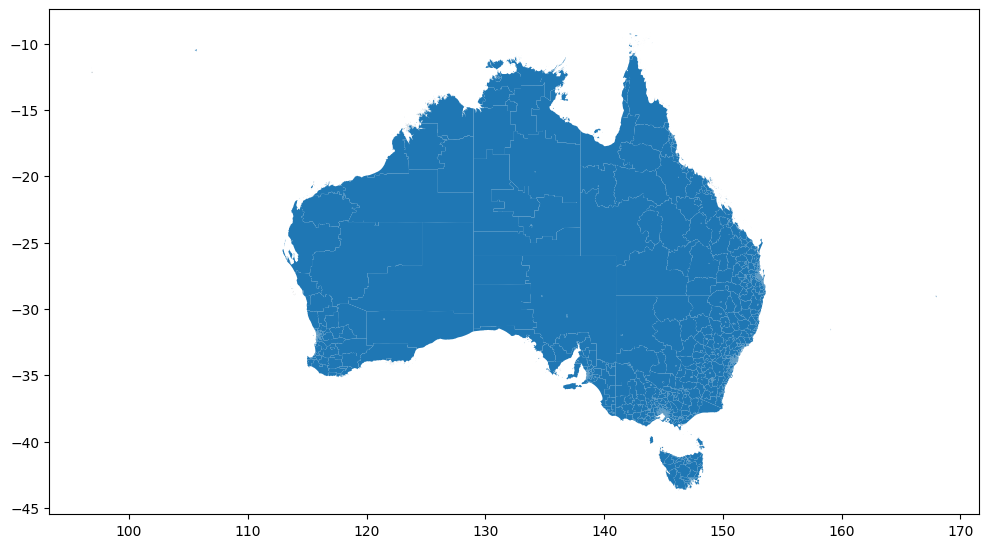

In [9]:
# Visualize SA2 boundary
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

sa2_boundary_gdf.plot(
    ax=ax,
    # edgecolor='red',
    linewidth = 0.2
)